In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

In [119]:
df=pd.read_csv("titanic.csv")
df.head()

 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
print(df.shape)

(891, 12)


In [23]:
#dropping unnecessary features
df=df.drop(["PassengerId","Name","Ticket","Cabin"],axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
#checking and handling missing values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [26]:
#for age columns:
df=df.interpolate(method='nearest')

In [27]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [28]:
#for categorical column (Embarked)
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [29]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
#changing categorical columns (sex,embarked)
df = pd.get_dummies(df,drop_first = True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,19.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [31]:
#features and labels
X= df.iloc[:, 1:]
Y= df.iloc[:, 0]

In [32]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [33]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [59]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=0)

In [35]:
print(X_test.shape)
print(Y_test.shape)

(179, 8)
(179,)


In [36]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
140,3,24.0,0,2,15.2458,0,0,0
439,2,31.0,0,0,10.5000,1,0,1
817,2,31.0,1,1,37.0042,1,0,0
378,3,20.0,0,0,4.0125,1,0,0
491,3,21.0,0,0,7.2500,1,0,1


In [37]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
495,3,21.0,0,0,14.4583,1,0,0
648,3,56.0,0,0,7.5500,1,0,1
278,3,7.0,4,1,29.1250,1,1,0
31,1,40.0,1,0,146.5208,0,0,0
255,3,29.0,0,2,15.2458,0,0,0


In [38]:
Y_test.head()

495    0
648    0
278    0
31     1
255    1
Name: Survived, dtype: int64

In [39]:
print(X_train.shape)
print(Y_train.shape)

(712, 8)
(712,)


## building the ANN

In [76]:
#building ANN using keras
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier

In [94]:
# Initialize our ANN model
kerasmodel = Sequential()
    
    # Add the input layer and first hidden layer with Dropout
kerasmodel.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu' , input_dim = 8))
kerasmodel.add(Dropout(rate = 0.1))
    
    # Adding the Second Hidden layer with Dropout
kerasmodel.add(Dense(64, kernel_initializer= 'uniform', activation = 'relu'))
kerasmodel.add(Dropout(rate = 0.1))
    
    # Adding the output layer
kerasmodel.add(Dense(1, kernel_initializer= 'uniform', activation = 'sigmoid'))
    
    # Compiling the ANN
kerasmodel.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [95]:
kerasmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [96]:
kerasmodel.fit(X_train,Y_train,epochs=150,batch_size=10,validation_data=(X_test, Y_test))

Epoch 1/150
72/72 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.6475 - val_loss: 0.6005 - val_accuracy: 0.7095
Epoch 2/150
72/72 [==============================] - 0s 633us/step - loss: 0.6202 - accuracy: 0.6699 - val_loss: 0.5981 - val_accuracy: 0.7263
Epoch 3/150
72/72 [==============================] - 0s 590us/step - loss: 0.6055 - accuracy: 0.6910 - val_loss: 0.5631 - val_accuracy: 0.7709
Epoch 4/150
72/72 [==============================] - 0s 654us/step - loss: 0.5916 - accuracy: 0.6924 - val_loss: 0.5403 - val_accuracy: 0.7654
Epoch 5/150
72/72 [==============================] - 0s 585us/step - loss: 0.5730 - accuracy: 0.6882 - val_loss: 0.5229 - val_accuracy: 0.7709
Epoch 6/150
72/72 [==============================] - 0s 598us/step - loss: 0.5434 - accuracy: 0.7163 - val_loss: 0.4930 - val_accuracy: 0.7933
Epoch 7/150
72/72 [==============================] - 0s 591us/step - loss: 0.5395 - accuracy: 0.7486 - val_loss: 0.4825 - val_accuracy: 0.7542
E

In [97]:
#train accuracy
loss_value,accuracy=kerasmodel.evaluate(X_train,Y_train)
print(f'train accuracy is: {accuracy*100}')

23/23 [==============================] - 0s 360us/step - loss: 0.3760 - accuracy: 0.8441
train accuracy is: 84.41011309623718


In [98]:
#test accuracy
score = kerasmodel.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score

Test loss: 0.41644445061683655
Test accuracy: 0.8100558519363403


[0.41644445061683655, 0.8100558519363403]

In [99]:
#predicting output
y_pred=kerasmodel.predict(X_test,batch_size=10)
y_pred;

18/18 [==============================] - 0s 383us/step


In [100]:
for i in range(len(y_pred)) :
    if y_pred[i]<=0.5:
        y_pred[i]=0
    else:
        y_pred[i]=1

y_pred

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],

## visualisation using heatmap

In [101]:
cm_ann=tf.math.confusion_matrix(Y_test,y_pred)
cm_ann

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  10],
       [ 24,  45]], dtype=int32)>

Text(0.5, 1.0, 'Results for ANN model')

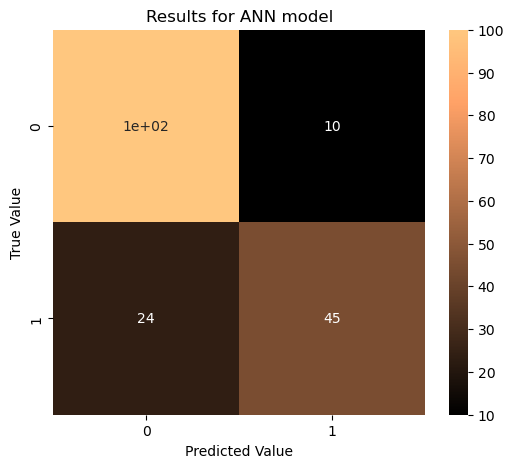

In [115]:

import seaborn as sb
plt.figure(figsize=(6,5))
sb.heatmap(cm_ann,annot=True,cmap='copper')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Results for ANN model')

In [158]:
#predicting with MLPclassifier

In [105]:
from sklearn.neural_network import MLPClassifier

In [106]:
ANN_Sklearn =  MLPClassifier(random_state=1, max_iter=800)

In [107]:
ANN_Sklearn.fit(X_train, Y_train)

MLPClassifier(max_iter=800, random_state=1)

In [108]:
Y_pred_Sklearn = ANN_Sklearn.predict(X_test)
Y_pred_Sklearn

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [109]:
Accuracy_Sklearn = accuracy_score(Y_pred_Sklearn, Y_test)
print('Accuracy Score:', Accuracy_Sklearn)

Accuracy Score: 0.8156424581005587


In [111]:
cm_mlp=tf.math.confusion_matrix(Y_test,Y_pred_Sklearn)
cm_mlp


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[97, 13],
       [20, 49]], dtype=int32)>

Text(0.5, 1.0, 'Results for ANN model')

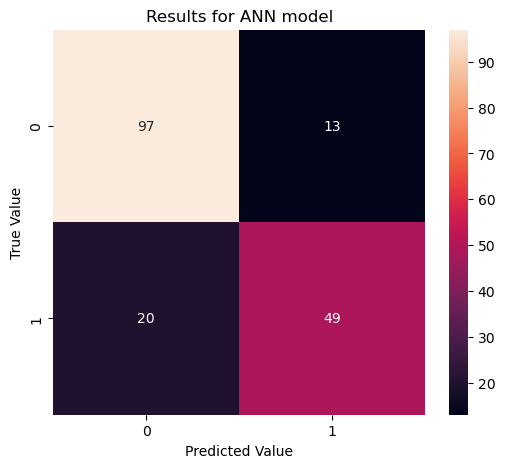

In [116]:
import seaborn as sb
plt.figure(figsize=(6,5))
sb.heatmap(cm_mlp,annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Results for ANN model')